<a href="https://colab.research.google.com/github/nonoumasy/Airbnb-Lisbon-Analysis/blob/master/Keras_Sequential_vs_Functional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras: Sequential vs Functional

There are two ways to build Keras models: sequential and functional.

The sequential API allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

The functional API allows you to create models that have a lot more flexibility as you can easily define models where layers connect to more than just the previous and next layers. 

You can think of layers as a function. Input(x) goes thru the function and comes out as output(y). So each function is like a lambda function that does something to the input(x). Thats one way of thinking about it.



In [0]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [0]:
# load data
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# find how many features for input_dim
print('The number of features: ', X.shape)

# find out how many target classes
print('The number of target classes: ', len(set(y)))

The number of features:  (150, 4)
The number of target classes:  3


In [0]:
# preprocessing, one_hot_encode categorical values
from keras.utils import to_categorical
trainY = to_categorical(y)

# not sure if we need to scale the dataset. I used keras BatchNormalization but found scaling the data got a better score.
ss = StandardScaler() 

# preprocessing pipeline
pipe = make_pipeline(ss)
X_scaled = pipe.fit_transform(X)

Using TensorFlow backend.


# Using Sequential API

In [0]:
from keras.models import Sequential
from keras.layers import Dense

def define_model():
    s_model = Sequential()
    s_model.add(Dense(50, input_dim=4, activation='relu'))
    s_model.add(Dense(12, activation='relu'))
    s_model.add(Dense(3, activation='softmax'))
    s_model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
    return s_model

s_model = define_model()
s_model.fit(X_scaled, trainY, validation_split=0.1, epochs=30, batch_size=20)

_, accuracy = s_model.evaluate(X_scaled, trainY)
print('Accuracy: %.2f' % (accuracy*100))






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 135 samples, validate on 15 samples
Epoch 1/30





135/135 [==============================] - 1s 9ms/step - loss: 1.1877 - acc: 0.3111 - val_loss: 1.1360 - val_acc: 0.0000e+00
Epoch 2/30
135/135 [==============================] - 0s 255us/step - loss: 1.0963 - acc: 0.3481 - val_loss: 1.0936 - val_acc: 0.1333
Epoch 3/30
135/135 [==============================] - 0s 210us/step - loss: 1.0221 - acc: 0.3926 - val_loss: 1.0480 - val_acc: 0.1333
Epoch 4/30
135/135 [==============================] - 0s 208us/step - loss: 0.9535 - acc: 0.4815 - val_loss: 0.9876 - val_acc: 0.3333
Epoch 5/30
135/135 [==============================] - 0s 222us/step - loss: 0.8883 - acc: 0.6296 - val_loss: 0.9353 - val_acc: 0.4000
Epoch 6/30
135/135 [==============================] - 0s 182us/step - loss: 0.8250 - acc: 0.7259 - val_loss: 0.8879 - val_acc: 0.4667
Epoch 7/30
135/135 [======================

Text(0, 0.5, 'accuracy')

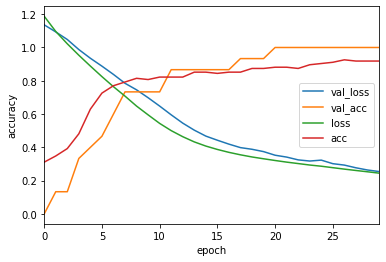

In [0]:
# visualize model evaluation
pd.DataFrame(s_model.history.history).plot()
plt.xlabel('epoch')
plt.ylabel('accuracy')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                612       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 39        
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________
None



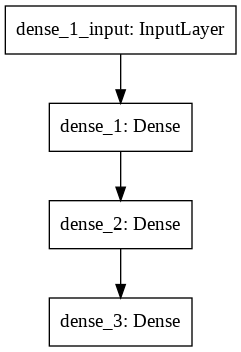

In [0]:
# printout summary of model
print(s_model.summary())
print()
# show schematic of model
from keras.utils import plot_model
plot_model(s_model)

# Using Functional API

You will probably use this more.

In [0]:
from keras.models import Model
from keras.layers import Input, Dense

def define_model_by_functional_api():
    input1 = Input(shape=(4,)) # this returns a tensor
    hidden1 = Dense(50, activation='relu')(input1)
    hidden2 = Dense(12, activation='relu')(hidden1)
    output = Dense(3, activation='softmax')(hidden2)
    f_model = Model(inputs=input1, outputs=output)
    f_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return f_model

f_model = define_model_by_functional_api()
f_model.fit(X_scaled, trainY, epochs=30, validation_split=0.2, batch_size=20)

_, accuracy = f_model.evaluate(X_scaled, trainY)
print('Accuracy: %.2f' % (accuracy*100))

Train on 120 samples, validate on 30 samples
Epoch 1/30
120/120 [==============================] - 0s 2ms/step - loss: 1.0838 - acc: 0.4167 - val_loss: 1.6737 - val_acc: 0.0000e+00
Epoch 2/30
120/120 [==============================] - 0s 216us/step - loss: 1.0034 - acc: 0.5167 - val_loss: 1.5892 - val_acc: 0.0000e+00
Epoch 3/30
120/120 [==============================] - 0s 193us/step - loss: 0.9355 - acc: 0.6167 - val_loss: 1.5076 - val_acc: 0.0000e+00
Epoch 4/30
120/120 [==============================] - 0s 209us/step - loss: 0.8725 - acc: 0.7000 - val_loss: 1.4391 - val_acc: 0.0000e+00
Epoch 5/30
120/120 [==============================] - 0s 209us/step - loss: 0.8147 - acc: 0.7417 - val_loss: 1.3793 - val_acc: 0.0000e+00
Epoch 6/30
120/120 [==============================] - 0s 195us/step - loss: 0.7635 - acc: 0.8000 - val_loss: 1.3249 - val_acc: 0.0000e+00
Epoch 7/30
120/120 [==============================] - 0s 199us/step - loss: 0.7148 - acc: 0.8083 - val_loss: 1.2760 - val_acc: 0.

Text(0, 0.5, 'accuracy')

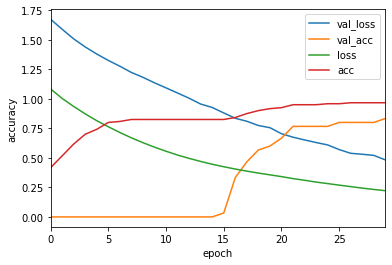

In [0]:
# visualize model evaluation
pd.DataFrame(f_model.history.history).plot()
plt.xlabel('epoch')
plt.ylabel('accuracy')

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                250       
_________________________________________________________________
dense_5 (Dense)              (None, 12)                612       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 39        
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________
None



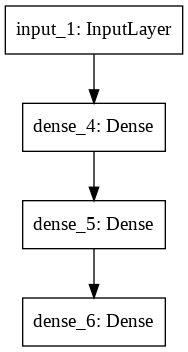

In [0]:
# printout summary of model
print(f_model.summary())
print()
# show schematic of model
from keras.utils import plot_model
plot_model(f_model)